In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [6]:
image1 = cv.imread('dataset/color_segmented/BASOPHIL.PNG',2)
image2 = cv.imread('dataset/color_segmented/EOSINOPHIL.PNG',2)
image3 = cv.imread('dataset/color_segmented/LYMPHOCYTE.PNG',2)
image4 = cv.imread('dataset/color_segmented/MONOCYTE.PNG',2)
image5 = cv.imread('dataset/color_segmented/NEUTROPHIL.PNG',2)
ret, thresh = cv.threshold(image1, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret1, thresh1 = cv.threshold(image2, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, thresh2 = cv.threshold(image3, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, thresh3 = cv.threshold(image4, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret4, thresh4 = cv.threshold(image5, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)


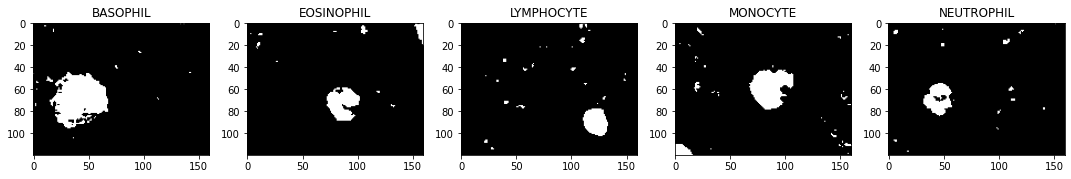

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(151)
plt.title('BASOPHIL')
plt.imshow(thresh,'gray')

plt.subplot(152)
plt.title('EOSINOPHIL')
plt.imshow(thresh1,'gray')

plt.subplot(153)
plt.title('LYMPHOCYTE')
plt.imshow(thresh2,'gray')

plt.subplot(154)
plt.title('MONOCYTE')
plt.imshow(thresh3,'gray')

plt.subplot(155)
plt.title('NEUTROPHIL')
plt.imshow(thresh4,'gray')

plt.tight_layout()
plt.show()

In [8]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))

In [9]:
def cekErosi(temp,kernel): 
    for i in range(len(kernel)):
      for j in range(len(kernel[i])):
        #ketika kernel bernilai satu akan tetapi nilai matriks yang diperiksa bernilai 0
        #maka nilai yang di return false.
        if(kernel[i][j]==1 and temp[i][j] == 0): 
          return False
    #ketika semua nilai telah diperiksa dan semua bernilai 1 maka return true
    return True    

In [10]:
def erosi(citra,kernel,jmlpad):
    result = np.zeros(citra.shape)  #mendeklarasi citra hasil
    pad = np.pad(citra,(jmlpad,jmlpad),mode='constant') #memberikan padding pada citra
    for i in range(jmlpad,len(pad)-jmlpad):  #melakukan perulangan pada nilai asal citra yg telah di padding
        for j in range(jmlpad,len(pad[i])-jmlpad):  #melakukan perulangan pada nilai asal citra yang telah dipadding
            temp = pad[i-jmlpad:i+jmlpad+1,j-jmlpad:j+jmlpad+1] #diambil potongan matriks 3x3 dari citra yang telah dipadding
            cek = cekErosi(temp,kernel); #dilakukan pemanggilan fungsi cekerosi
            if(cek): #ketike cek bernilai true
              result[i-jmlpad][j-jmlpad] = 255 #maka pixel origin citra diberi nilai 255
    return result #return result

In [11]:
def cekDilasi(temp,kernel): 
    for i in range(len(kernel)):
      for j in range(len(kernel[i])):
        #ketika kernel bernilai satu akan tetapi nilai matriks yang diperiksa bernilai 1 atau 255 (selain 0)
        #maka nilai yang di return True.
        if(kernel[i][j]==1 and temp[i][j] != 0): 
          return True
    #ketika semua nilai telah diperiksa dan semua bernilai 0 maka return False
    return False 

In [12]:
def dilasi(citra,kernel,jmlpad):
    result = np.zeros(citra.shape) #mendeklarasi citra hasil
    pad = np.pad(citra,(jmlpad,jmlpad),mode='constant') #memberikan padding pada citra
    for i in range(jmlpad,len(pad)-jmlpad):  #melakukan perulangan pada baris nilai asal citra yg telah di padding
        for j in range(jmlpad,len(pad[i])-jmlpad):  #melakukan perulangan pada kolom nilai asal citra yg telah di padding
            temp = pad[i-jmlpad:i+jmlpad+1,j-jmlpad:j+jmlpad+1] #diambil potongan matriks 3x3 dari citra yang telah dipadding
            cek = cekDilasi(temp,kernel); #dilakukan pemanggilan fungsi cekDilasi
            if(cek): #jika true
              result[i-jmlpad][j-jmlpad] = 255 #maka pixel origin citra diberi nilai 255
    return result #return result

EROSI

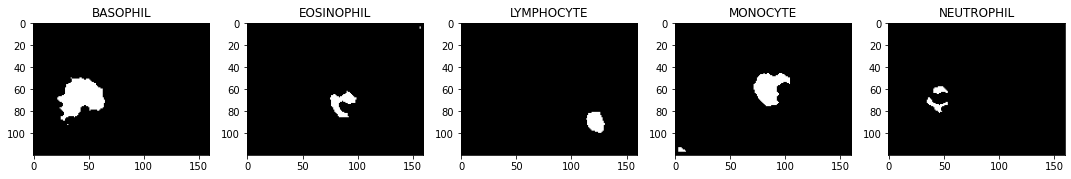

In [13]:
Erosi1 = erosi(thresh,kernel,3)
Erosi2 = erosi(thresh1,kernel,3)
Erosi3 = erosi(thresh2,kernel,3)
Erosi4 = erosi(thresh3,kernel,3)
Erosi5 = erosi(thresh4,kernel,3)

plt.figure(figsize=(15,15))
plt.subplot(151)
plt.title('BASOPHIL')
plt.imshow(Erosi1,'gray')

plt.subplot(152)
plt.title('EOSINOPHIL')
plt.imshow(Erosi2,'gray')

plt.subplot(153)
plt.title('LYMPHOCYTE')
plt.imshow(Erosi3,'gray')

plt.subplot(154)
plt.title('MONOCYTE')
plt.imshow(Erosi4,'gray')

plt.subplot(155)
plt.title('NEUTROPHIL')
plt.imshow(Erosi5,'gray')

plt.tight_layout()
plt.show()

DILASI

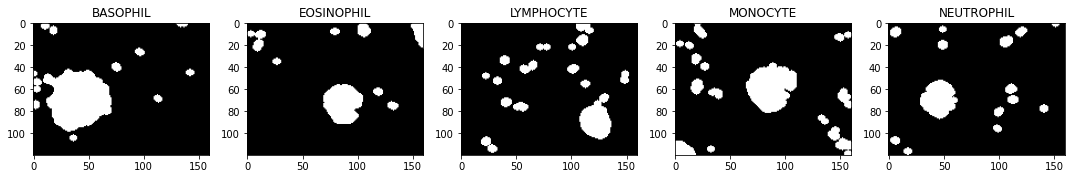

In [14]:
Dilasi1 = dilasi(thresh,kernel,3)
Dilasi2 = dilasi(thresh1,kernel,3)
Dilasi3 = dilasi(thresh2,kernel,3)
Dilasi4 = dilasi(thresh3,kernel,3)
Dilasi5 = dilasi(thresh4,kernel,3)

plt.figure(figsize=(15,15))
plt.subplot(151)
plt.title('BASOPHIL')
plt.imshow(Dilasi1,'gray')

plt.subplot(152)
plt.title('EOSINOPHIL')
plt.imshow(Dilasi2,'gray')

plt.subplot(153)
plt.title('LYMPHOCYTE')
plt.imshow(Dilasi3,'gray')

plt.subplot(154)
plt.title('MONOCYTE')
plt.imshow(Dilasi4,'gray')

plt.subplot(155)
plt.title('NEUTROPHIL')
plt.imshow(Dilasi5,'gray')

plt.tight_layout()
plt.show()

OPENNING

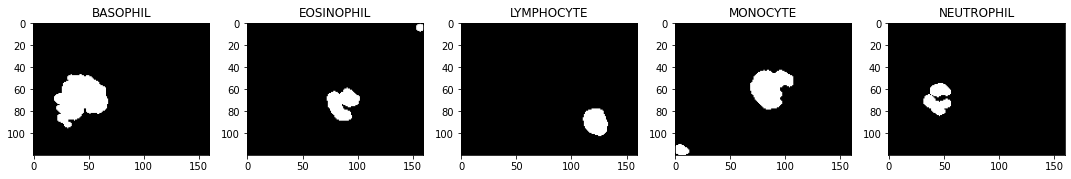

In [15]:
Opening1 = dilasi(Erosi1,kernel,3)
Opening2 = dilasi(Erosi2,kernel,3)
Opening3 = dilasi(Erosi3,kernel,3)
Opening4 = dilasi(Erosi4,kernel,3)
Opening5 = dilasi(Erosi5,kernel,3)


plt.figure(figsize=(15,15))
plt.subplot(151)
plt.title('BASOPHIL')
plt.imshow(Opening1,'gray')

plt.subplot(152)
plt.title('EOSINOPHIL')
plt.imshow(Opening2,'gray')

plt.subplot(153)
plt.title('LYMPHOCYTE')
plt.imshow(Opening3,'gray')

plt.subplot(154)
plt.title('MONOCYTE')
plt.imshow(Opening4,'gray')

plt.subplot(155)
plt.title('NEUTROPHIL')
plt.imshow(Opening5,'gray')

plt.tight_layout()
plt.show()

CLOSING

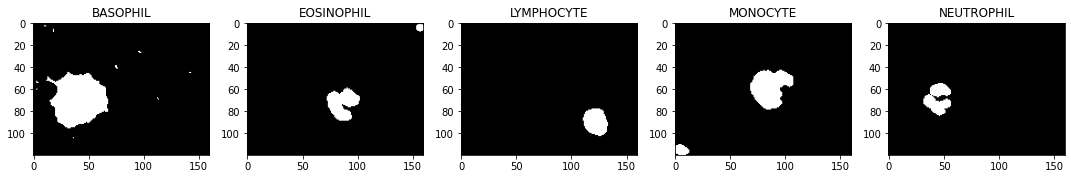

In [16]:
Closing1 = erosi(Dilasi1,kernel,3)
Closing2 = erosi(Dilasi2,kernel,3)
Closing3 = erosi(Dilasi3,kernel,3)
Closing4 = erosi(Dilasi4,kernel,3)
Closing5 = erosi(Dilasi5,kernel,3)

plt.figure(figsize=(15,15))
plt.subplot(151)
plt.title('BASOPHIL')
plt.imshow(Closing1,'gray')

plt.subplot(152)
plt.title('EOSINOPHIL')
plt.imshow(Opening2,'gray')

plt.subplot(153)
plt.title('LYMPHOCYTE')
plt.imshow(Opening3,'gray')

plt.subplot(154)
plt.title('MONOCYTE')
plt.imshow(Opening4,'gray')

plt.subplot(155)
plt.title('NEUTROPHIL')
plt.imshow(Opening5,'gray')

plt.tight_layout()
plt.show()